In [27]:
DATASET_ROOT = os.environ['DATASET_ROOT']
json_file = os.path.join(
    DATASET_ROOT,
    'main_lmdb/labels/modanet_snaps.json'
)
json_file

df = pd.read_json(json_file)
it = df.iterrows()

'/Users/hiroshi.matsui/datasets/ModaNet/main_lmdb/labels/modanet_snaps.json'

In [28]:
category_csv_file = os.path.join(
    DATASET_ROOT,
    'main_lmdb/labels/master_category.csv'
)
df_ctg = pd.read_csv(category_csv_file).set_index('category_id')
df_ctg

,category
category_id,
1,bag
2,belt
3,boots
4,footwear
5,coat/jacket/suit/blazers/cardigan/sweater/Jump...
6,dress/t-shir dress
7,sunglasses
8,pants/jeans/leggings
9,top/blouse/t-shirt/shirt


In [29]:
from chainercv.utils import read_image
from chainercv.visualizations import vis_image, vis_bbox

img_dir = os.path.join(DATASET_ROOT, 'main_lmdb/images')


def reform_bbox(bbox_xywh):
    x, y, w, h = list(bbox_xywh)
    bbox_yxYX = np.array([
        y, x, y+h, x+w
    ]).astype(np.float)
    return bbox_yxYX

18

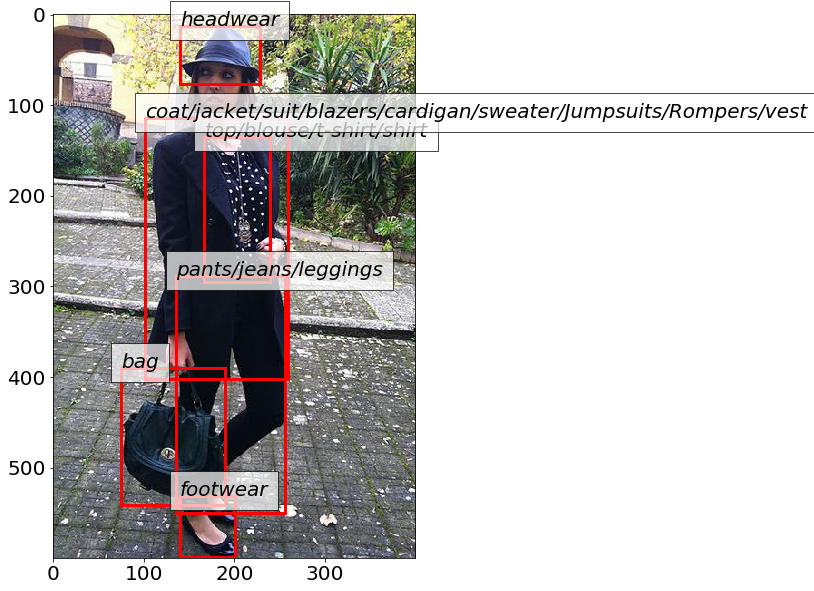

In [48]:
i, snap = next(it)
i

# snap

items = snap['items']
img_file = os.path.join(img_dir, snap['file_name'])

bboxes = np.array([reform_bbox(item['bbox']) for item in items])
labels = np.array([item['category_id'] for item in items])

_ = vis_bbox(
    read_image(img_file),
    bboxes,
    label=labels-1,
    label_names=df_ctg['category'].tolist(),
)